In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing the Data
##### Taking the data overview
##### Checking for null values

In [2]:
df = pd.read_csv('/content/full_grouped.csv')

In [3]:
df.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


##### No NULL values found cleaned dataset

In [5]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [7]:
df.duplicated().sum()

0

In [10]:
df.head(2)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe


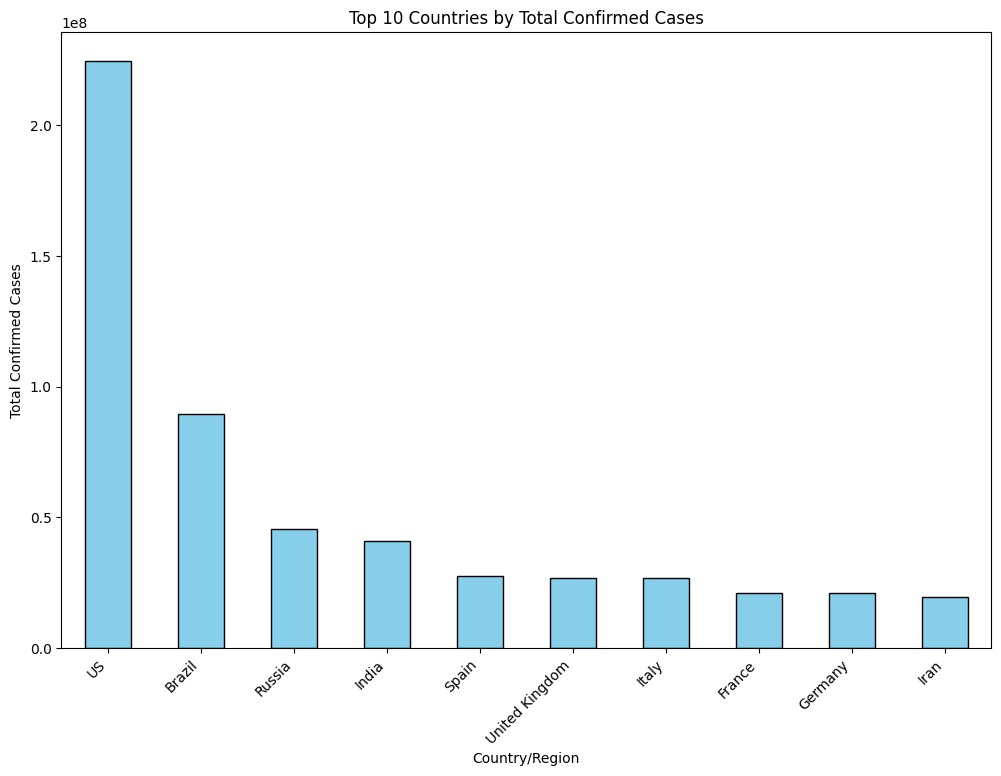

In [18]:
country_wise = df.groupby('Country/Region')['Confirmed'].sum()

# Sort countries by the number of confirmed cases and select the top 10
top_countries = country_wise.sort_values(ascending=False).head(10)

# Create a bar plot of the top 10 countries by confirmed cases
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Countries by Total Confirmed Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.show()


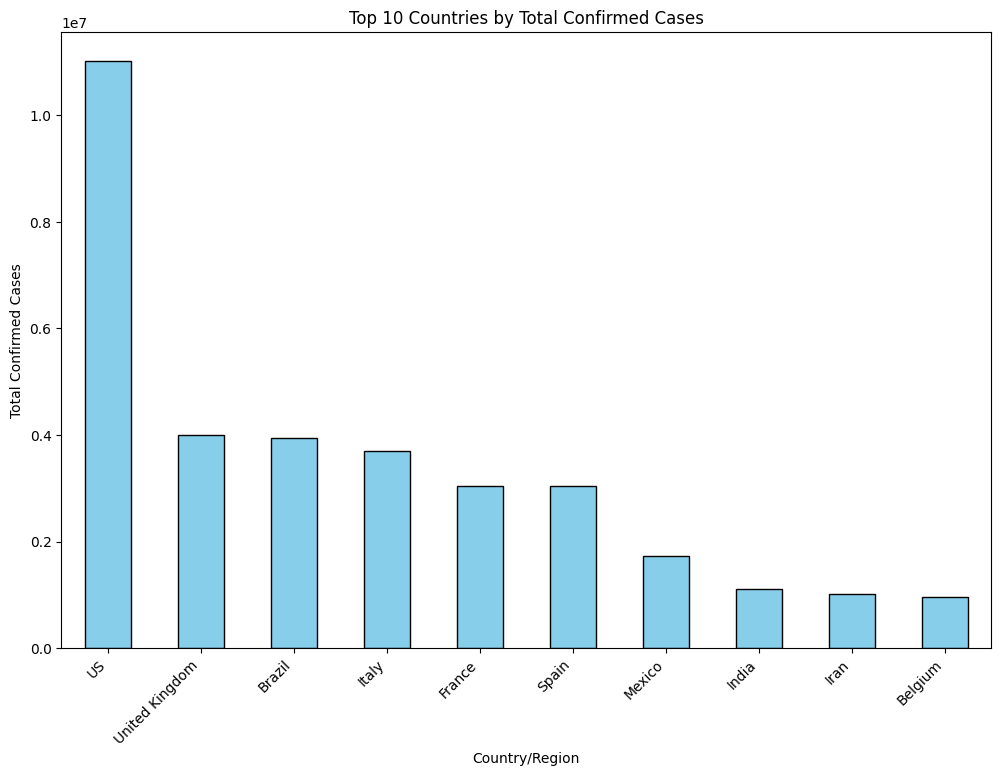

In [19]:
country_wise = df.groupby('Country/Region')['Deaths'].sum()

# Sort countries by the number of Death cases and select the top 10
top_countries = country_wise.sort_values(ascending=False).head(10)

# Create a bar plot of the top 10 countries by confirmed cases
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Countries by Total Confirmed Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.show()


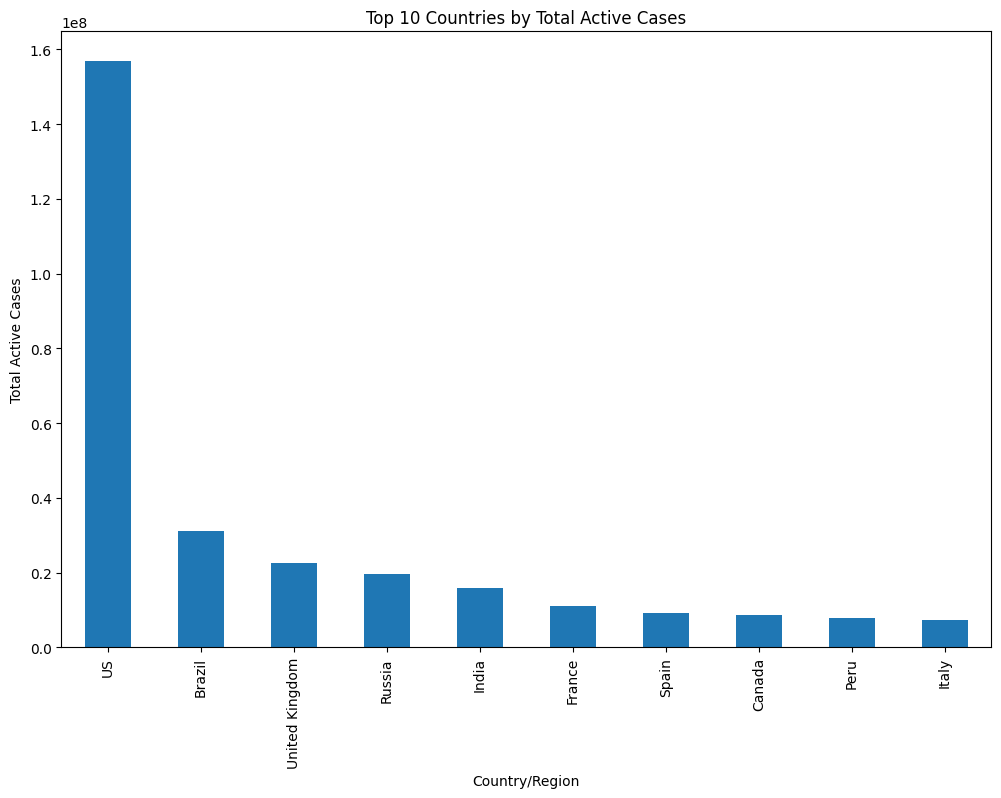

In [20]:

# Total Active cases by Country/Region
active_cases_by_country = df.groupby('Country/Region')['Active'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
active_cases_by_country.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Total Active Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Active Cases')
plt.show()


In [21]:
# Calculate recovery rate and death rate
df['RecoveryRate'] = df['Recovered'] / df['Confirmed'] * 100
df['DeathRate'] = df['Deaths'] / df['Confirmed'] * 100

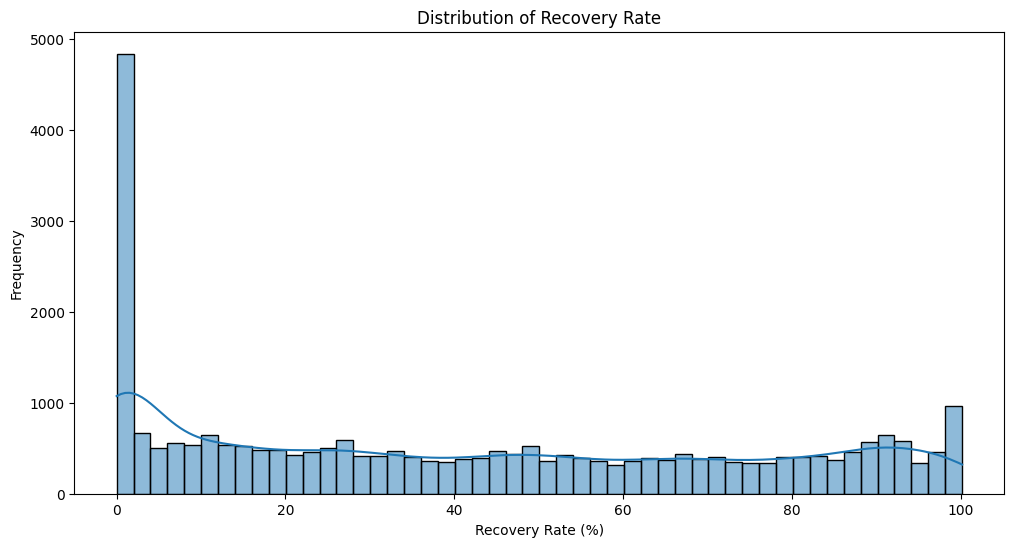

In [22]:
# Plot recovery rate
plt.figure(figsize=(12, 6))
sns.histplot(df['RecoveryRate'], bins=50, kde=True)
plt.title('Distribution of Recovery Rate')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Frequency')
plt.show()


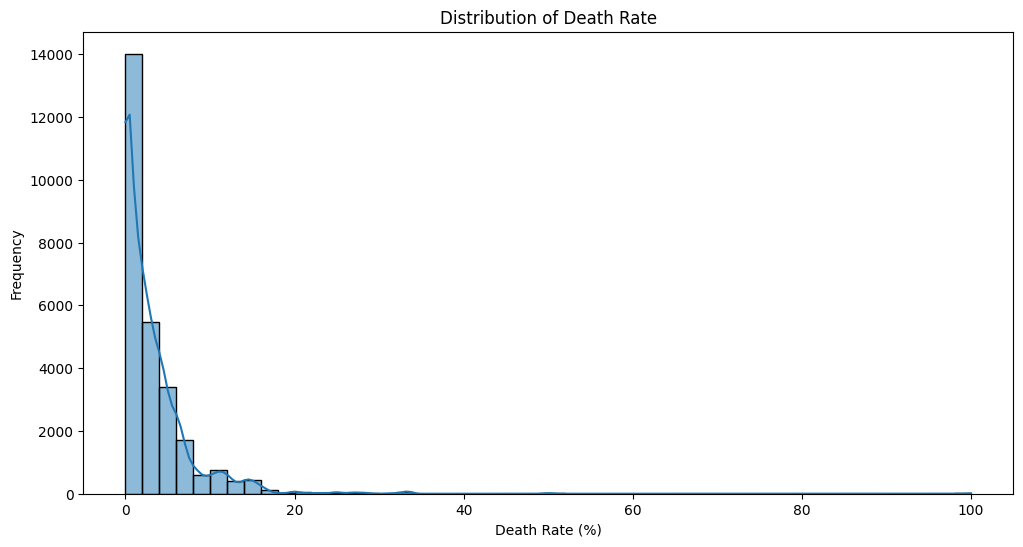

In [23]:
# Plot death rate
plt.figure(figsize=(12, 6))
sns.histplot(df['DeathRate'], bins=50, kde=True)
plt.title('Distribution of Death Rate')
plt.xlabel('Death Rate (%)')
plt.ylabel('Frequency')
plt.show()

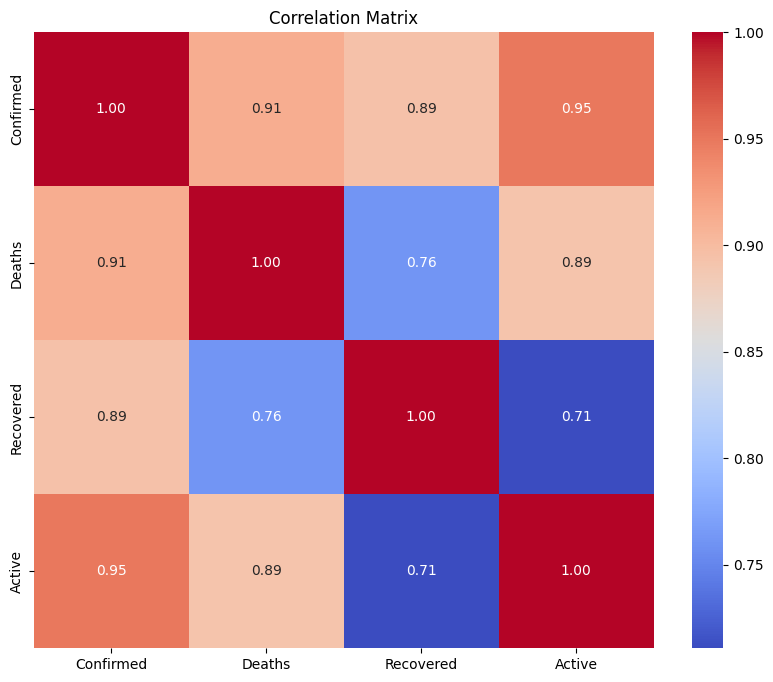

In [24]:
# Compute correlation matrix
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


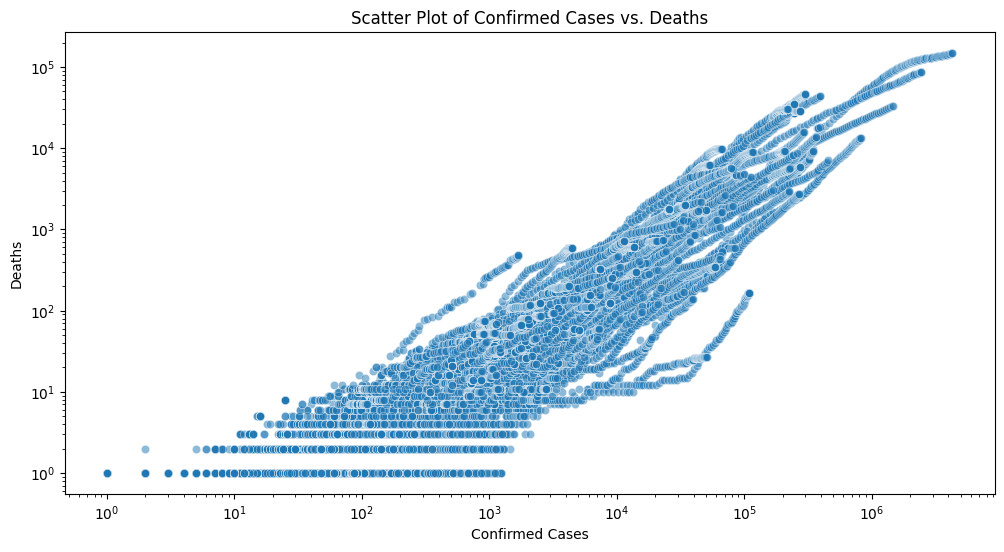

In [25]:
# Create a scatter plot of Confirmed vs. Deaths
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Confirmed', y='Deaths', data=df, alpha=0.5)
plt.title('Scatter Plot of Confirmed Cases vs. Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.xscale('log')  # Use log scale if data spans several orders of magnitude
plt.yscale('log')  # Use log scale if data spans several orders of magnitude
plt.show()